importing functions

In [37]:
import numpy as np
from numpy import polynomial as P
import matplotlib.pyplot as plt
import scipy as sc
from datetime import datetime
from scipy import stats
from modules import  *
import importlib

 



## Horner method

### Function 

In [36]:
def horner_eval(coeffs, z):
    """
    Evaluate a polynomial at a given point using Horner's method.
    
    Parameters:
    coeffs (array-like): Coefficients of the polynomial (in ascending order of degree).
    z (float or array-like): Point(s) at which to evaluate the polynomial.
    
    Returns:
    float or ndarray: Value of the polynomial at point(s) z.
    """
    result = coeffs[-1]  # Start with the highest degree coefficient
    for c in reversed(coeffs[:-1]):  # Iterate through remaining coefficients in reverse
        result = result * z + c
    return result

def standard_polynomial_eval(coeffs, z):
    """Standard polynomial evaluation method"""
    result = 0
    for i, coeff in enumerate(coeffs):
        result += coeff * (z ** i)
    return result

### Tests 

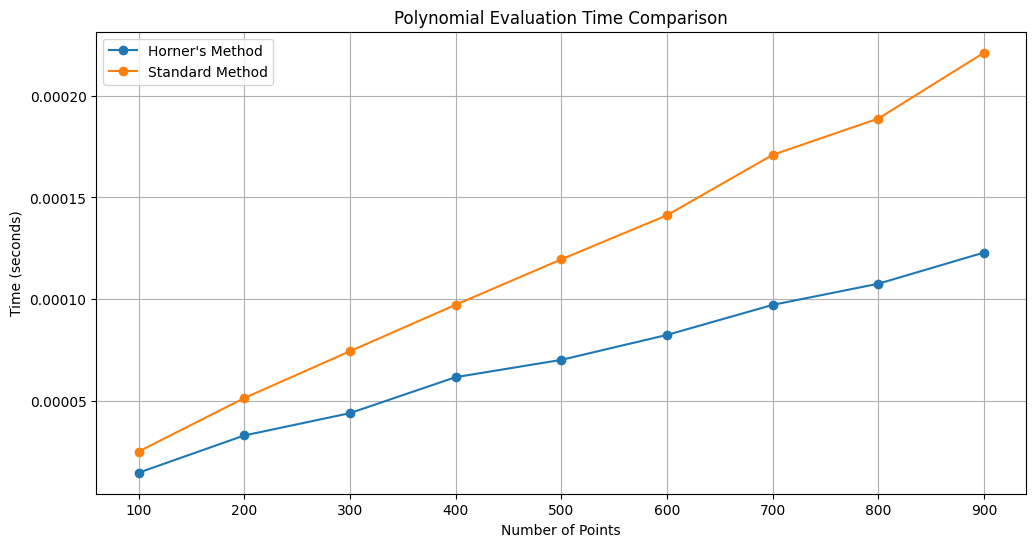

Average time for Horner's method: 0.000070 ± 0.000034
Average time for standard method: 0.000121 ± 0.000062
Speed improvement: 1.72x ± 0.08x


In [51]:
# Test parameters
n_start = 100
n_end = 1000
n_sep = 100
n_points_range = range(n_start, n_end, n_sep)
num_trials = 100
test_point = 1.5

# Lists to store timing results
horner_times = []
standard_times = []
 

for n in n_points_range:
    # list that contains n probe time 
    horner_trial_times = []
    standard_trial_times = []
    for _ in range(num_trials):
        # generating random coeff:
        coeffs = np.random.rand(n)
        
        start_time = datetime.now()
        _ = horner_eval(coeffs, test_point)
        end_time = datetime.now()
        horner_trial_times.append((end_time - start_time).total_seconds())
        
    # Standard method timing
        start_time = datetime.now()
        _ = standard_polynomial_eval(coeffs, test_point)
        end_time = datetime.now()
        standard_trial_times.append((end_time - start_time).total_seconds())
        
    # calculating mean time 
    horner_times.append(np.mean(horner_trial_times))
    standard_times.append(np.mean(standard_trial_times))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(list(n_points_range), horner_times, label="Horner's Method", marker='o')
plt.plot(list(n_points_range), standard_times, label='Standard Method', marker='o')
plt.xlabel('Number of Points')
plt.ylabel('Time (seconds)')
plt.title('Polynomial Evaluation Time Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Print statistics
print(f"Average time for Horner's method: {np.mean(horner_times):.6f} ± {np.std(horner_times):.6f}")
print(f"Average time for standard method: {np.mean(standard_times):.6f} ± {np.std(standard_times):.6f}")
print(f"Speed improvement: {np.mean(standard_times)/np.mean(horner_times):.2f}x ± {np.std([x/y for x,y in zip(standard_times, horner_times)]):.2f}x")

## Zadanie 3, 4 

### funkcje

In [30]:
def clenshaw_evaluate(coeffs, x):
    """
    Clenshaw algorithm for evaluating Chebyshev polynomials
    """
    b_k1 = 0
    b_k2 = 0
    
    for c in reversed(coeffs[1:]):
        b_k = 2 * x * b_k1 - b_k2 + c
        b_k2 = b_k1
        b_k1 = b_k
    
    return x * b_k1 - b_k2 + coeffs[0]

In [41]:
def newton_to_standard(coeffs, x_points):
    """
    Convert Newton form coefficients to standard polynomial coefficients.
    
    Parameters:
    coeffs (array-like): Coefficients in Newton form
    x_points (array-like): x coordinates used for Newton interpolation
    
    Returns:
    ndarray: Coefficients in standard polynomial form (ascending order)
    """
    n = len(coeffs)
    result = np.zeros(n)plt.rcParams['font.family'] = 'DejaVu Sans'  # Dla polskich znaków


def standard_to_chebyshev(x):
    """
    Convert polynomial coefficients to Chebyshev form.
    
    Parameters:
    x (array-like): Coefficients of the polynomial.
    
    Returns:
    ndarray: Coefficients in Chebyshev form.
    """
    poly = np.polynomial.Polynomial(x)
    poly_cheby = poly.convert(kind=P.Chebyshev)
    return poly_cheby.coef


### testy

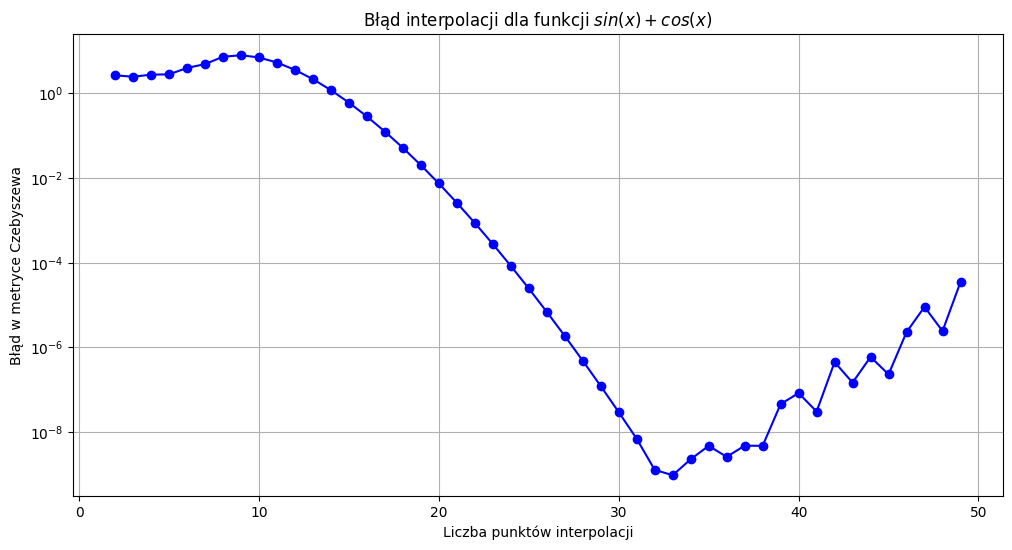

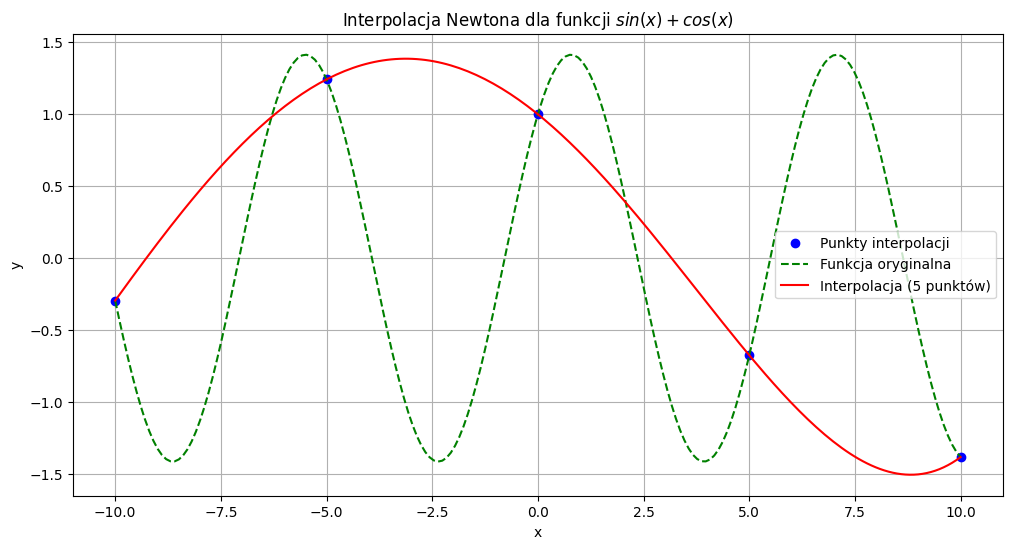

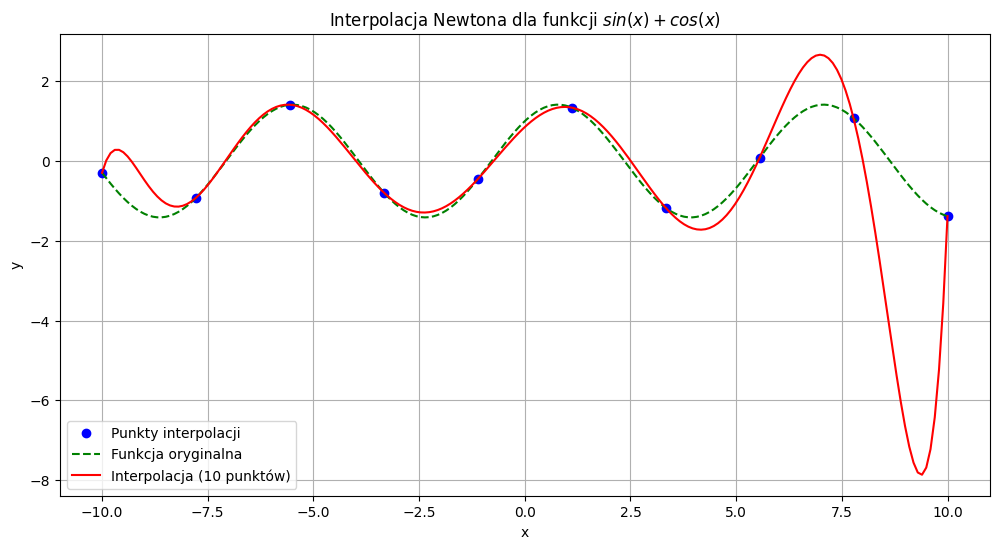

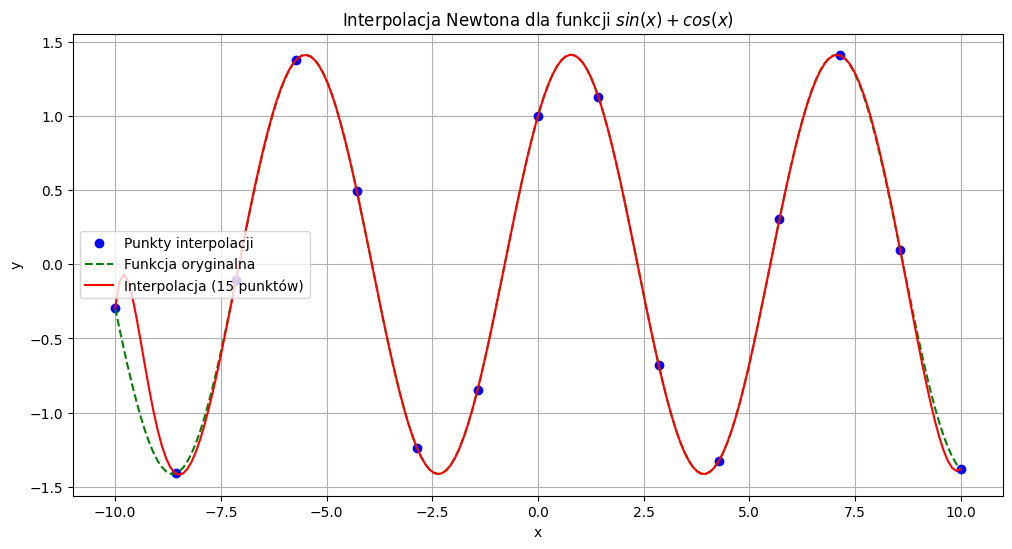

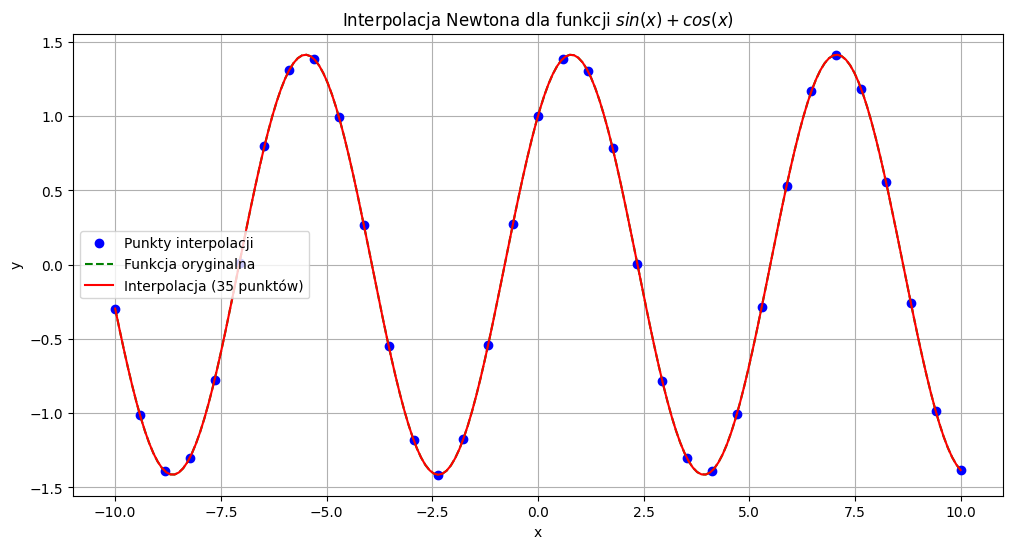


Wyniki dla funkcji $sin(x) + cos(x)$:
Minimalny błąd: 9.63e-10
Osiągnięty dla 33 punktów


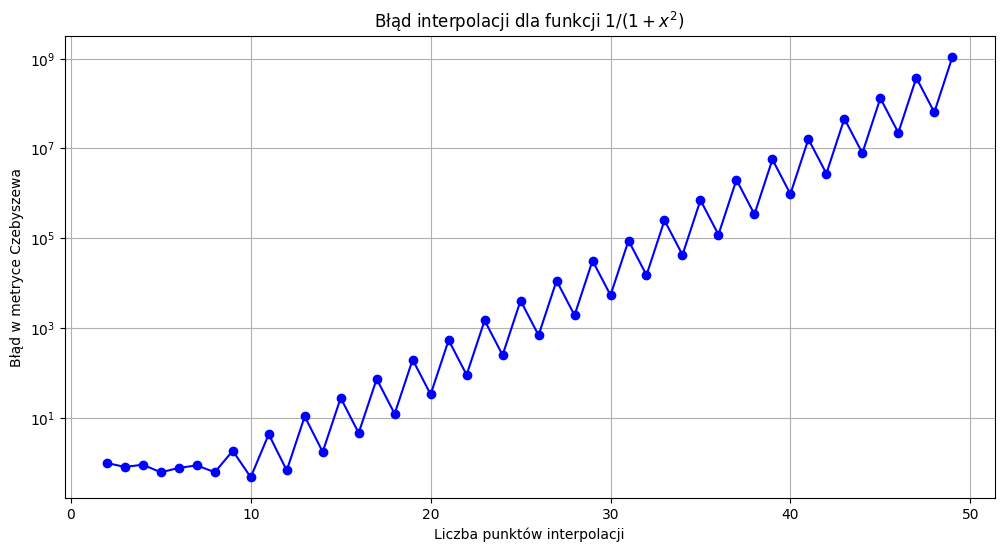

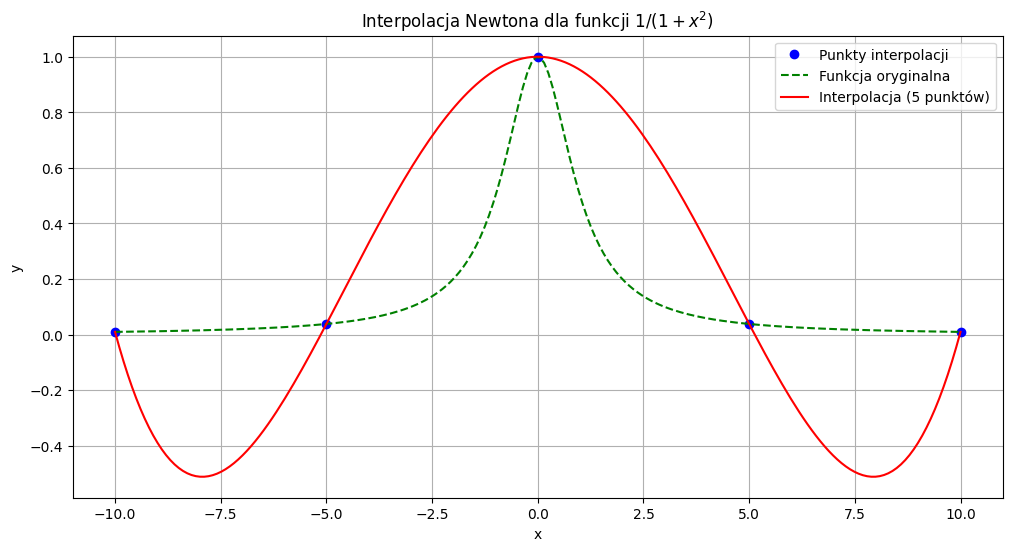

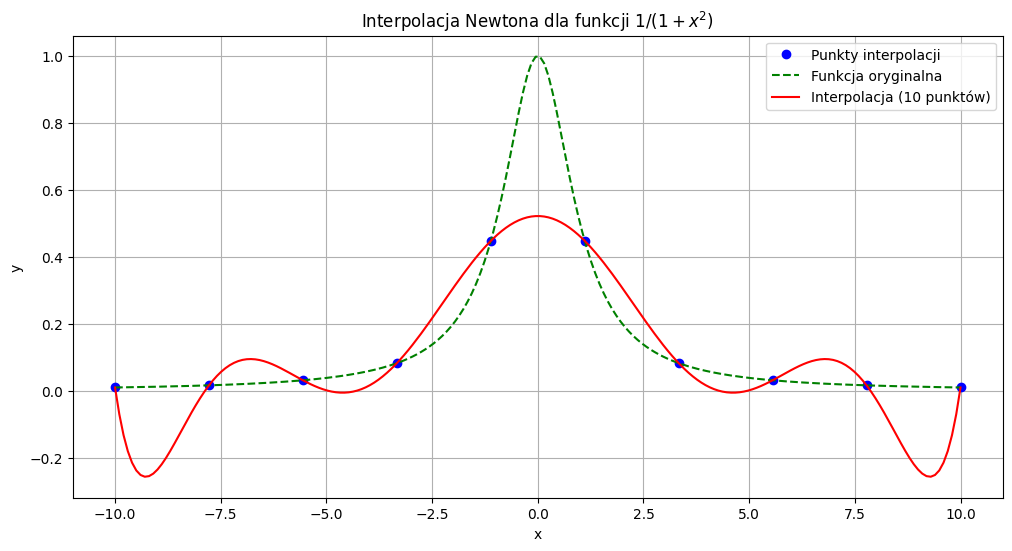

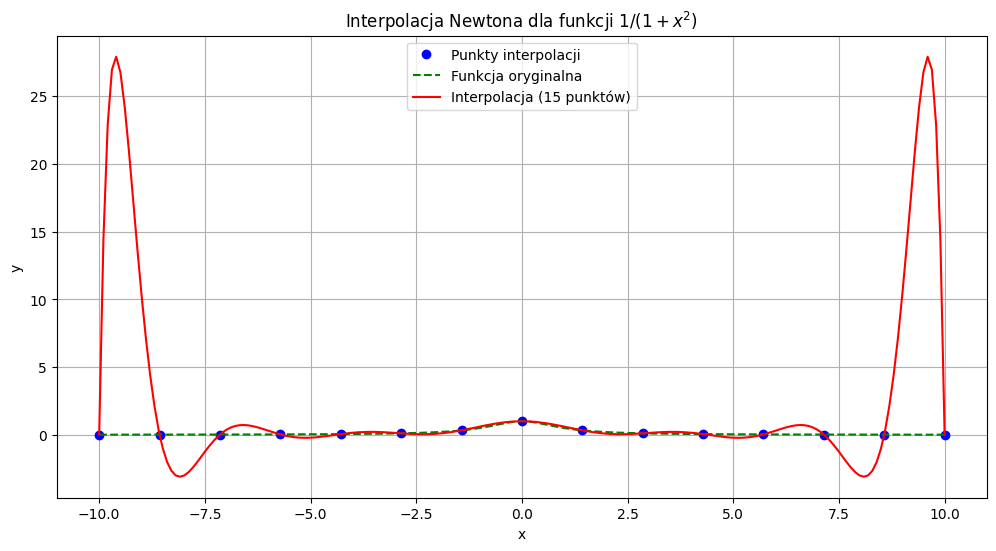

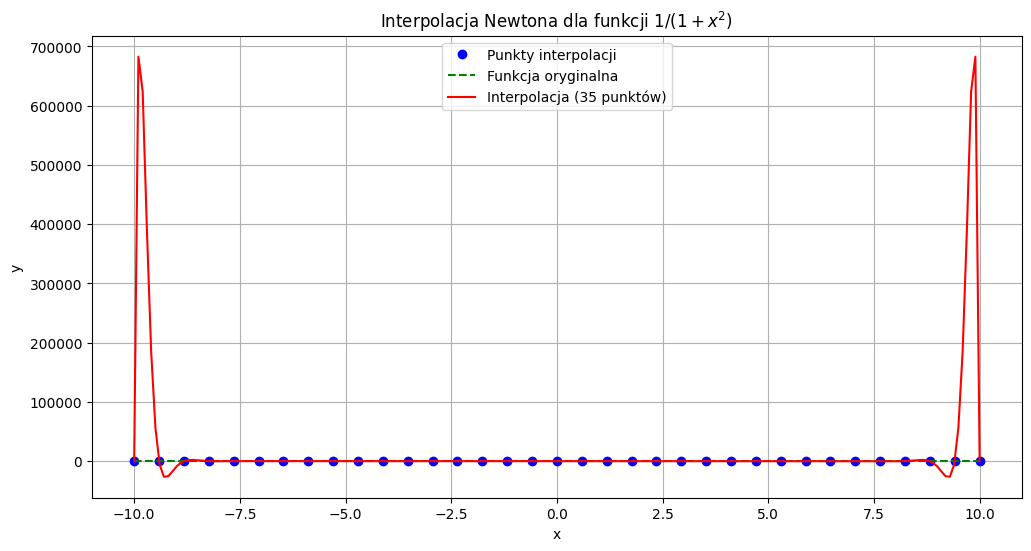


Wyniki dla funkcji $1/(1 + x^2)$:
Minimalny błąd: 4.78e-01
Osiągnięty dla 10 punktów


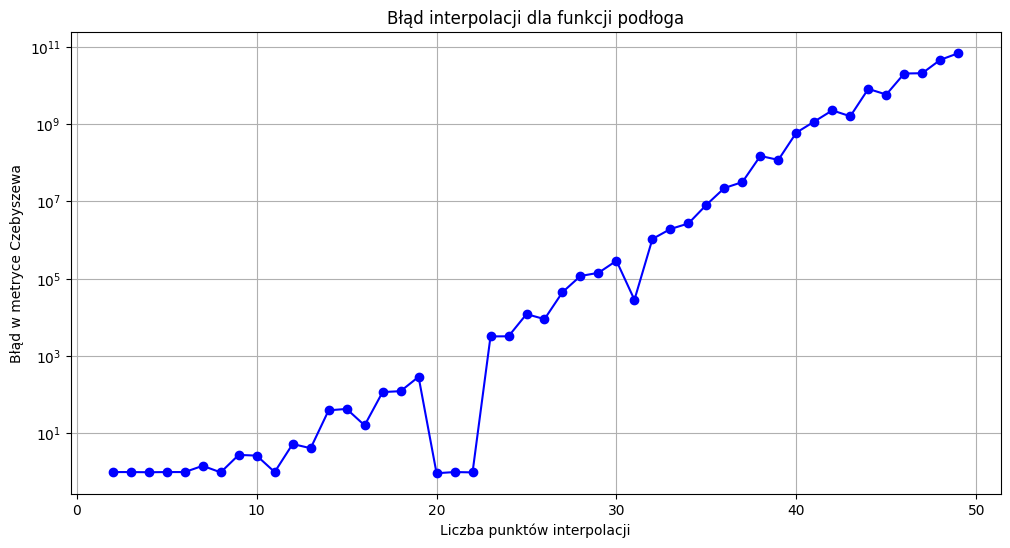

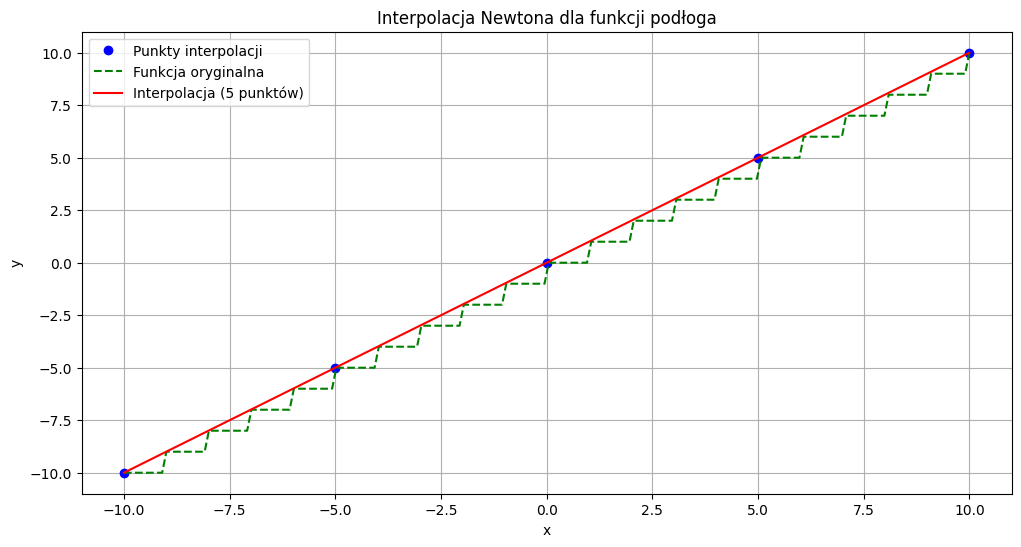

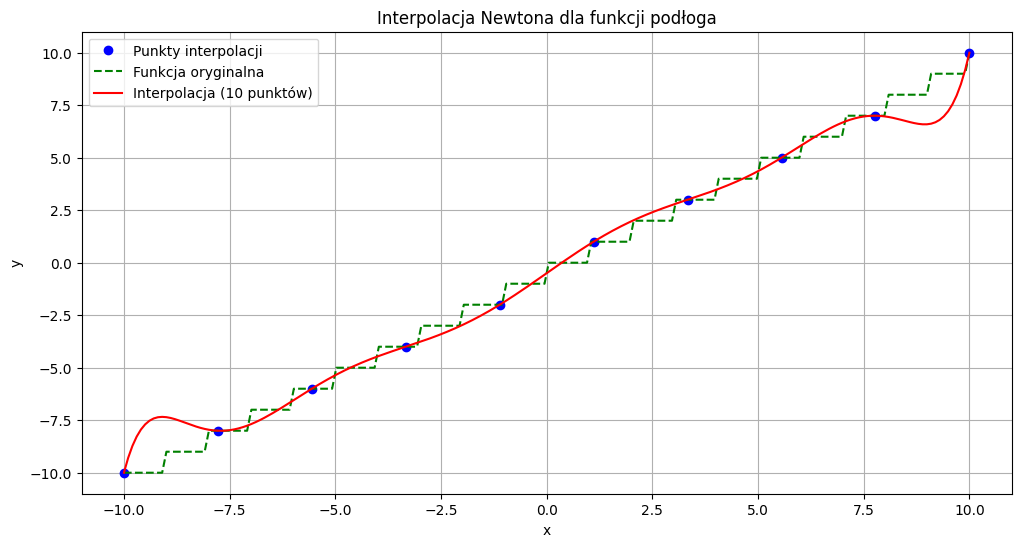

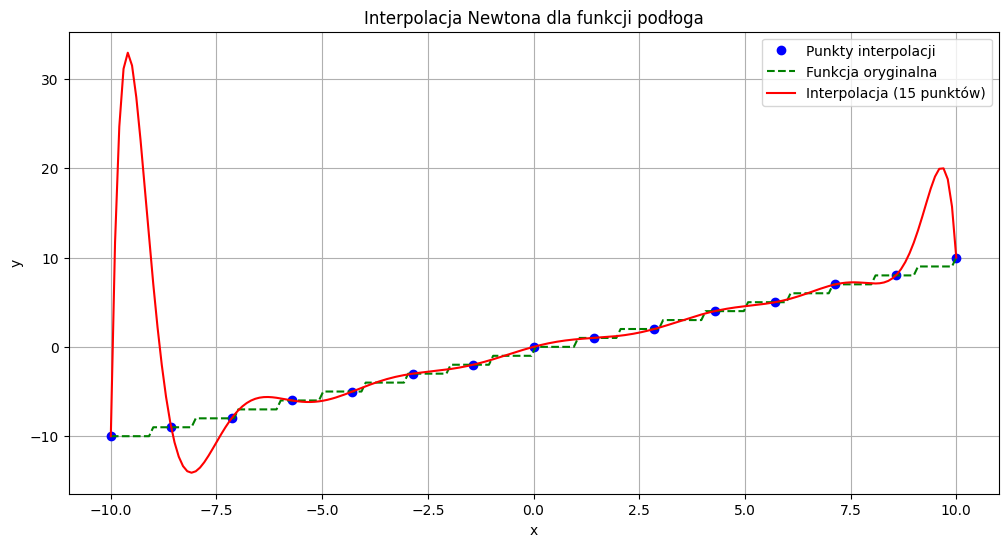

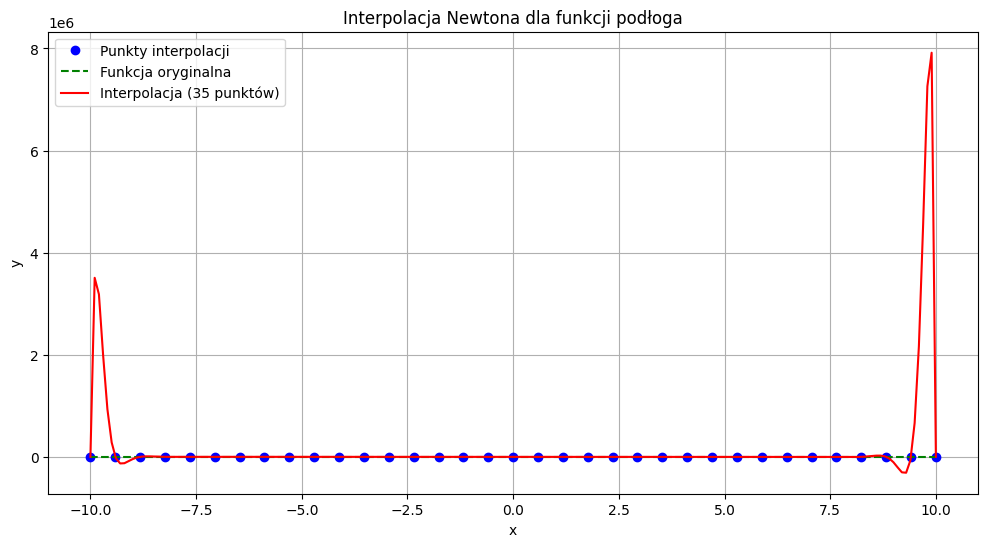


Wyniki dla funkcji podłoga:
Minimalny błąd: 9.32e-01
Osiągnięty dla 20 punktów


In [28]:
def test_functions():
    return {
        'trygonometryczna': (lambda x: np.sin(x) + np.cos(x), 'funkcji $sin(x) + cos(x)$'),
        'wymierna': (lambda x: 1/(1 + x**2), 'funkcji $1/(1 + x^2)$'),
        'podłoga': (lambda x: np.floor(x), 'funkcji podłoga')
    }

def evaluate_newton_polynomial(coeffs, x_points, x_eval):
    """
    Oblicza wartość wielomianu Newtona dla punktu x_eval
    """
    result = coeffs[0]
    for i in range(1, len(coeffs)):
        term = coeffs[i]
        for j in range(i):
            term *= (x_eval - x_points[j])
        result += term
    return result

def chebyshev_error(func, coeffs, x_points, domain, num_points=1000):
    """
    Oblicza błąd w metryce Czebyszewa
    """
    x_eval = np.linspace(domain[0], domain[1], num_points)
    y_true = func(x_eval)
    y_approx = np.array([evaluate_newton_polynomial(coeffs, x_points, x) for x in x_eval])
    return np.max(np.abs(y_true - y_approx))

def plot_interpolation_comparison(func, label, n_points, domain=(-1, 1)):
    """
    Rysuje porównanie funkcji oryginalnej i interpolowanej dla zadanej liczby punktów
    """
    x_points = np.linspace(domain[0], domain[1], n_points)
    y_points = func(x_points)
    coeffs = newton_polynomial(x_points, y_points)
    
    x_plot = np.linspace(domain[0], domain[1], 200)
    y_true = func(x_plot)
    y_approx = np.array([evaluate_newton_polynomial(coeffs, x_points, x) for x in x_plot])
    
    plt.figure(figsize=(12, 6))
    plt.plot(x_points, y_points, 'bo', label='Punkty interpolacji')
    plt.plot(x_plot, y_true, 'g--', label='Funkcja oryginalna')
    plt.plot(x_plot, y_approx, 'r-', label=f'Interpolacja ({n_points} punktów)')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Interpolacja Newtona dla {label}')
    plt.grid(True)
    plt.legend()
    plt.show()

def analyze_interpolation_errors():
    """
    Analizuje błędy interpolacji dla różnych funkcji i liczby punktów
    """
    domain = (-10, 10)
    n_points_range = range(2, 50)  # od 2 do 50 punktów
    
    for func_name, (func, label) in test_functions().items():
        # Obliczanie błędów dla różnej liczby punktów
        errors = []
        for n in n_points_range:
            x_points = np.linspace(domain[0], domain[1], n)
            y_points = func(x_points)
            coeffs = newton_polynomial(x_points, y_points)
            error = chebyshev_error(func, coeffs, x_points, domain)
            errors.append(error)
        
        # Wykres błędów
        plt.figure(figsize=(12, 6))
        plt.plot(n_points_range, errors, 'bo-')
        plt.yscale('log')
        plt.xlabel('Liczba punktów interpolacji')
        plt.ylabel('Błąd w metryce Czebyszewa')
        plt.title(f'Błąd interpolacji dla {label}')
        plt.grid(True)
        plt.show()
        
        # Wykresy dla wybranych liczb punktów
        for n in [5, 10, 15, 35]:
            plot_interpolation_comparison(func, label, n, domain)
        
        # Statystyki
        min_error_idx = np.argmin(errors)
        print(f"\nWyniki dla {label}:")
        print(f"Minimalny błąd: {errors[min_error_idx]:.2e}")
        print(f"Osiągnięty dla {n_points_range[min_error_idx]} punktów")

# Uruchomienie analizy
analyze_interpolation_errors()

## Zadanie 5

/home/max/programming /git repositories /numerical-methods/modules.py:116: RuntimeWarning: overflow encountered in scalar multiply
  b_k = 2 * x * b_k1 - b_k2 + c
/home/max/programming /git repositories /numerical-methods/modules.py:116: RuntimeWarning: invalid value encountered in scalar subtract
  b_k = 2 * x * b_k1 - b_k2 + c
/tmp/ipykernel_30220/1968249437.py:30: RuntimeWarning: overflow encountered in scalar add
  result += coeffs[i] * T_next


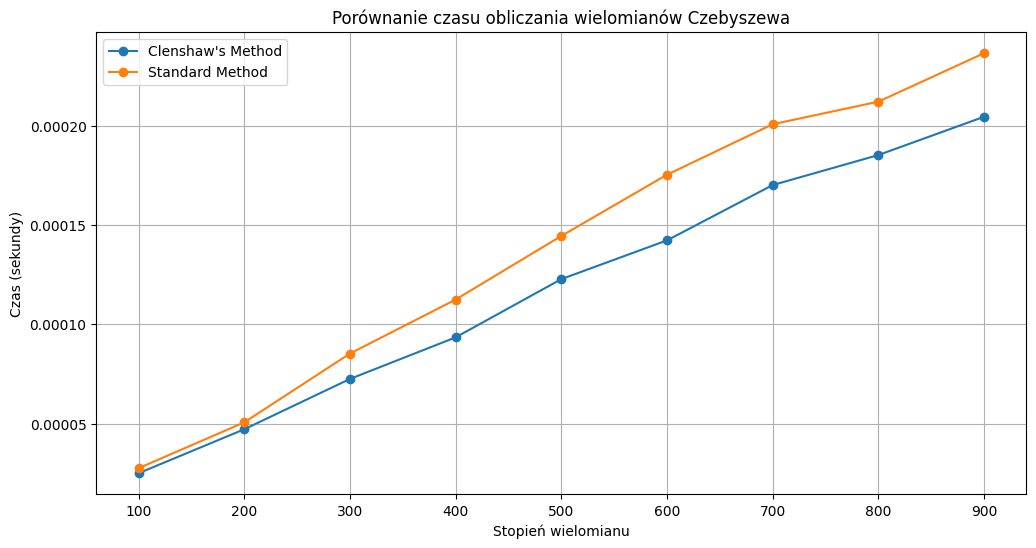

Średni czas dla metody Clenshawa: 0.000118 ± 0.000059
Średni czas dla metody standardowej: 0.000138 ± 0.000070
Przyspieszenie: 1.17x ± 0.05x


In [52]:
# Test parameters
n_start = 100
n_end = 1000
n_sep = 100
n_points_range = range(n_start, n_end, n_sep)
num_trials = 100
test_point = 1.5

# Lists to store timing results
clenshaw_times = []
standard_times = []

def standard_chebyshev_eval(coeffs, x):
    """
    Standard method for evaluating Chebyshev polynomial
    """
    result = 0
    T = [1, x]  # T[0] = T_0(x), T[1] = T_1(x)
    
    # Add first two terms
    if len(coeffs) > 0:
        result += coeffs[0] * T[0]
    if len(coeffs) > 1:
        result += coeffs[1] * T[1]
    
    # Calculate remaining terms using recurrence relation
    for i in range(2, len(coeffs)):
        # Recurrence relation for Chebyshev polynomials
        T_next = 2 * x * T[1] - T[0]
        result += coeffs[i] * T_next
        # Update T values for next iteration
        T[0] = T[1]
        T[1] = T_next
    
    return result

for n in n_points_range:
    # List that contains n probe time 
    clenshaw_trial_times = []
    standard_trial_times = []
    
    for _ in range(num_trials):
        # Generating random coefficients in Chebyshev form
        cheb_coeffs = np.random.rand(n)
        
        # Clenshaw method timing
        start_time = datetime.now()
        clenshaw_result = clenshaw_evaluate(cheb_coeffs, test_point)
        end_time = datetime.now()
        clenshaw_trial_times.append((end_time - start_time).total_seconds())
        
        # Standard method timing
        start_time = datetime.now()
        standard_result = standard_chebyshev_eval(cheb_coeffs, test_point)
        end_time = datetime.now()
        standard_trial_times.append((end_time - start_time).total_seconds())
        
    # Calculating mean time 
    clenshaw_times.append(np.mean(clenshaw_trial_times))
    standard_times.append(np.mean(standard_trial_times))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(list(n_points_range), clenshaw_times, label="Clenshaw's Method", marker='o')
plt.plot(list(n_points_range), standard_times, label='Standard Method', marker='o')
plt.xlabel('Stopień wielomianu')
plt.ylabel('Czas (sekundy)')
plt.title('Porównanie czasu obliczania wielomianów Czebyszewa')
plt.legend()
plt.grid(True)
plt.show()

# Print statistics
print(f"Średni czas dla metody Clenshawa: {np.mean(clenshaw_times):.6f} ± {np.std(clenshaw_times):.6f}")
print(f"Średni czas dla metody standardowej: {np.mean(standard_times):.6f} ± {np.std(standard_times):.6f}")
print(f"Przyspieszenie: {np.mean(standard_times)/np.mean(clenshaw_times):.2f}x ± {np.std([x/y for x,y in zip(standard_times, clenshaw_times)]):.2f}x")

## Zadanie 6

In [ ]:
def trigonometric_interpolation(x_points, y_points):
    """
    Compute trigonometric interpolation coefficients.
    
    Parameters:
    x_points: Points in [0, 2π] domain
    y_points: Function values at x_points
    
    Returns:
    a_coeffs, b_coeffs: Coefficients for cosine and sine terms
    """
    n = len(x_points)
    m = (n - 1) // 2  # Number of coefficients for each trigonometric term
    
    # Initialize coefficient arrays
    a_coeffs = np.zeros(m + 1)  # For cosine terms (including a0)
    b_coeffs = np.zeros(m)      # For sine terms
    
    # Calculate coefficients using discrete Fourier transform
    for k in range(m + 1):
        # Cosine coefficients
        a_coeffs[k] = (2/n) * np.sum(y_points * np.cos(k * x_points))
        
        # Sine coefficients (except for k=0)
        if k < m:
            b_coeffs[k] = (2/n) * np.sum(y_points * np.sin((k+1) * x_points))
    
    # Adjust a0 coefficient
    a_coeffs[0] /= 2
    
    return a_coeffs, b_coeffs

def evaluate_trigonometric(x, a_coeffs, b_coeffs):
    """
    Evaluate trigonometric interpolation at point x
    """
    result = a_coeffs[0]  # Start with a0
    
    for k in range(1, len(a_coeffs)):
        result += a_coeffs[k] * np.cos(k * x)
    
    for k in range(len(b_coeffs)):
        result += b_coeffs[k] * np.sin((k+1) * x)
    
    return result

def test_trigonometric_interpolation():
    """
    Test the trigonometric interpolation with the same functions as before
    """
    test_funcs = {
        'trygonometryczna': (lambda x: np.sin(x) + np.cos(x), 'funkcji $sin(x) + cos(x)$'),
        'wymierna': (lambda x: 1/(1 + x**2), 'funkcji $1/(1 + x^2)$'),
        'podłoga': (lambda x: np.floor(x), 'funkcji podłoga')
    }
    
    n_points_range = range(5, 51, 2)  # Odd numbers of points
    domain = (0, 2*np.pi)
    
    for func_name, (func, label) in test_funcs.items():
        errors = []
        
        for n in n_points_range:
            # Ensure the first and last points are always included
            x_points = np.linspace(domain[0], domain[1], n, endpoint=True)
            y_points = func(x_points)
            
            # Compute interpolation coefficients
            a_coeffs, b_coeffs = trigonometric_interpolation(x_points, y_points)
            
            # Compute error
            x_eval = np.linspace(domain[0], domain[1], 1000)
            y_true = func(x_eval)
            y_approx = np.array([evaluate_trigonometric(x, a_coeffs, b_coeffs) for x in x_eval])
            error = np.max(np.abs(y_true - y_approx))
            errors.append(error)
            
            # Plot comparison for specific n values
            if n in [5, 11, 21, 41]:
                plt.figure(figsize=(12, 6))
                plt.plot(x_points, y_points, 'bo', label='Punkty interpolacji')
                plt.plot(x_eval, y_true, 'g--', label='Funkcja oryginalna')
                plt.plot(x_eval, y_approx, 'r-', label=f'Interpolacja ({n} punktów)')
                plt.xlabel('x')
                plt.ylabel('y')
                plt.title(f'Interpolacja trygonometryczna dla {label}')
                plt.grid(True)
                plt.legend()
                plt.show()
        
        # Plot errors
        plt.figure(figsize=(12, 6))
        plt.plot(n_points_range, errors, 'bo-')
        plt.yscale('log')
        plt.xlabel('Liczba punktów interpolacji')
        plt.ylabel('Błąd w metryce Czebyszewa')
        plt.title(f'Błąd interpolacji trygonometrycznej dla {label}')
        plt.grid(True)
        plt.show()
        
        # Print statistics
        min_error_idx = np.argmin(errors)
        print(f"\nWyniki dla {label}:")
        print(f"Minimalny błąd: {errors[min_error_idx]:.2e}")
        print(f"Osiągnięty dla {n_points_range[min_error_idx]} punktów")

# Run the tests
test_trigonometric_interpolation()

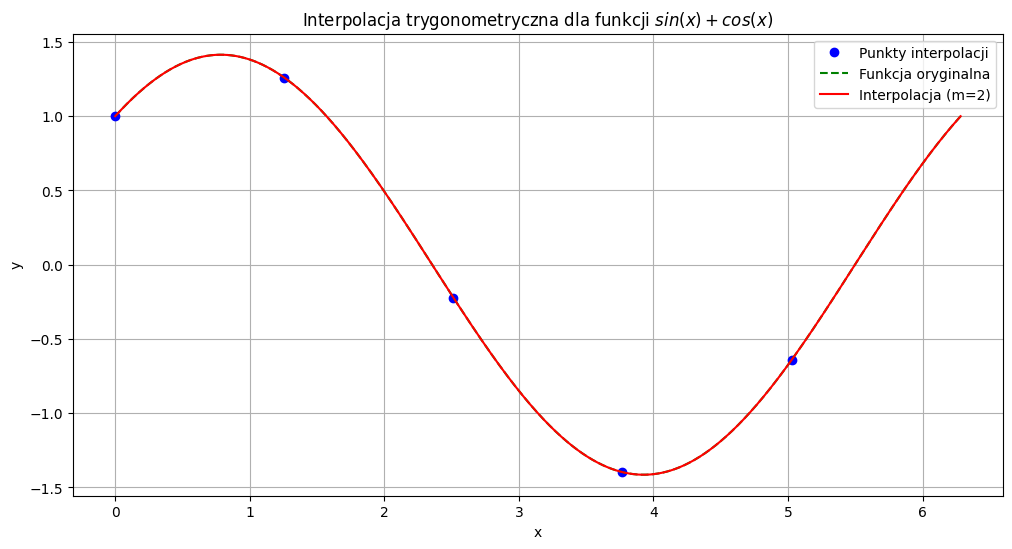

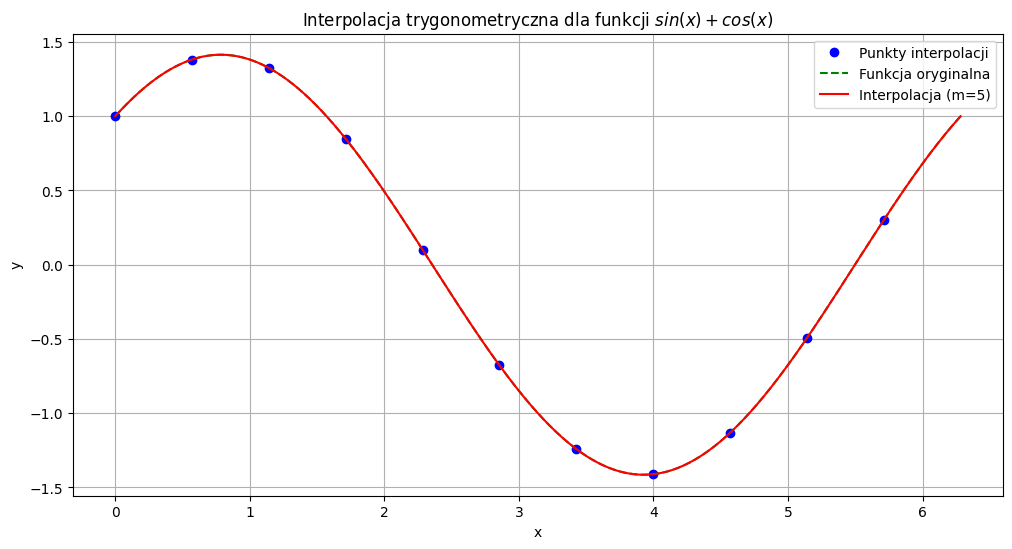

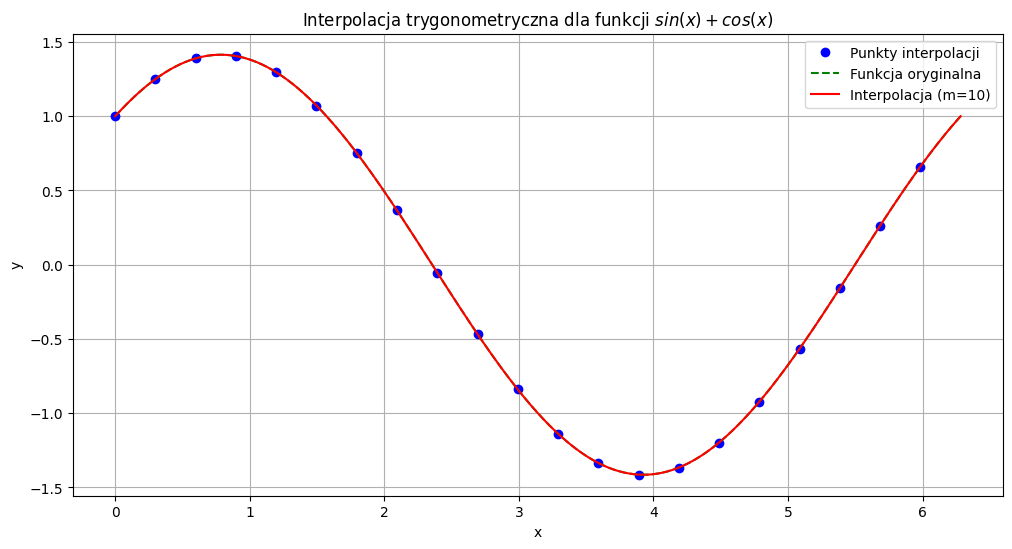

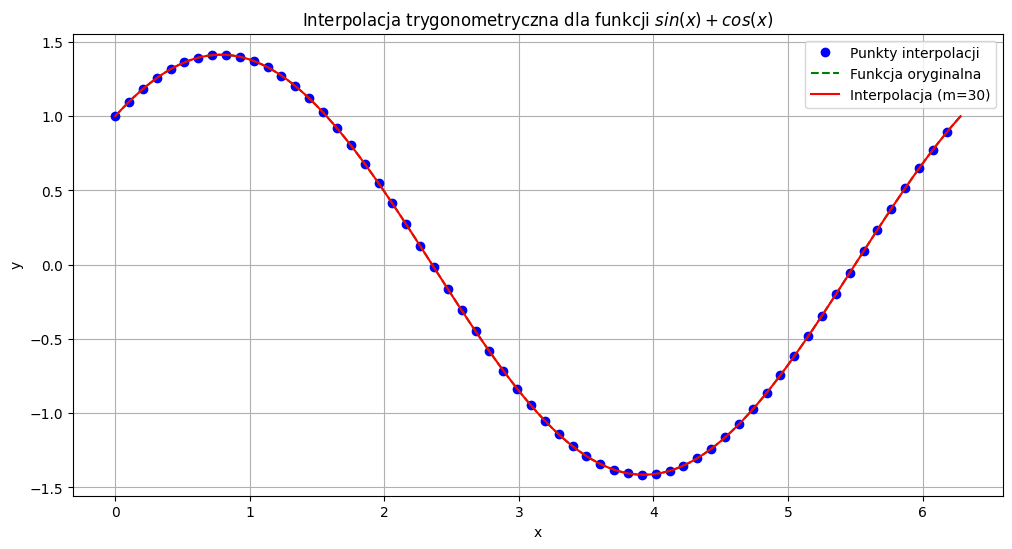

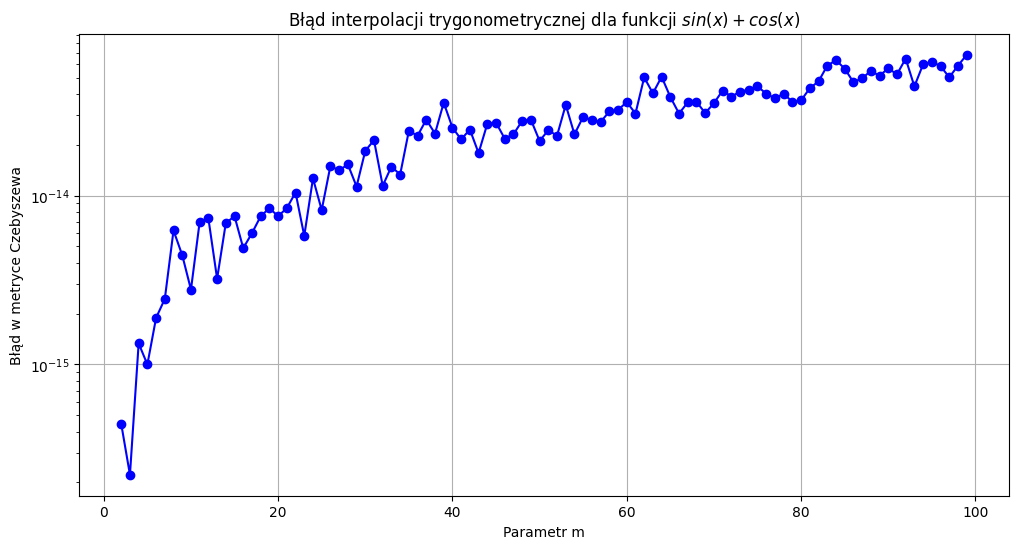


Wyniki dla funkcji $sin(x) + cos(x)$:
Minimalny błąd: 2.22e-16
Osiągnięty dla m=3


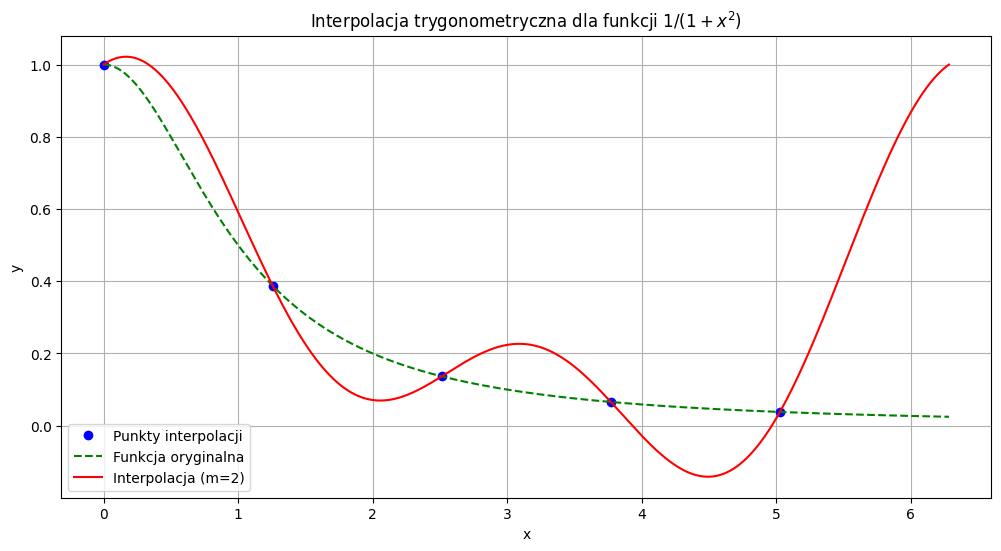

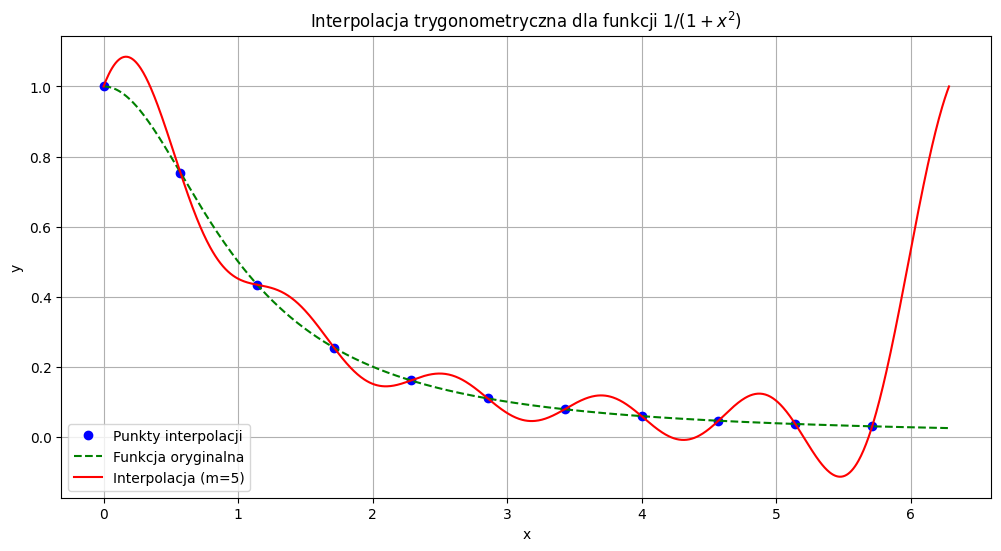

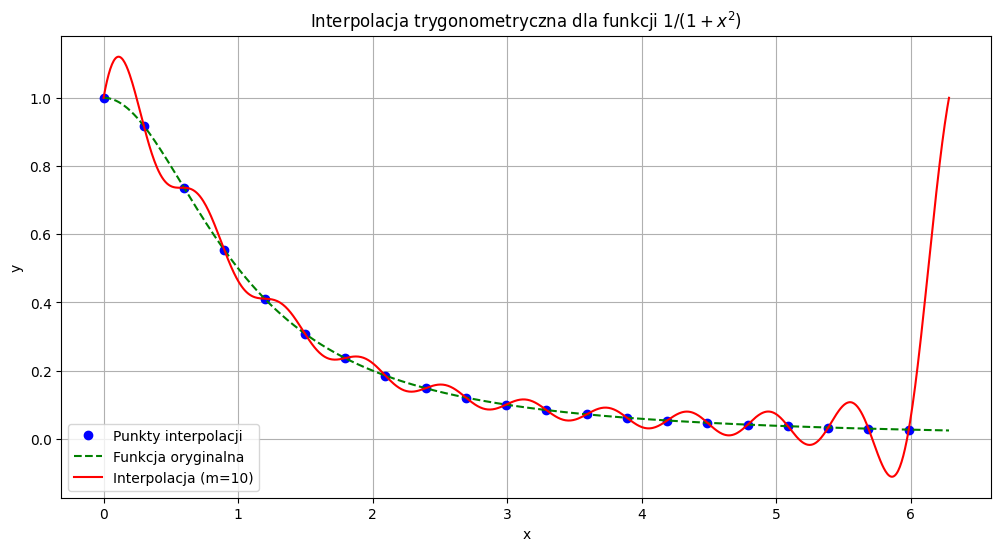

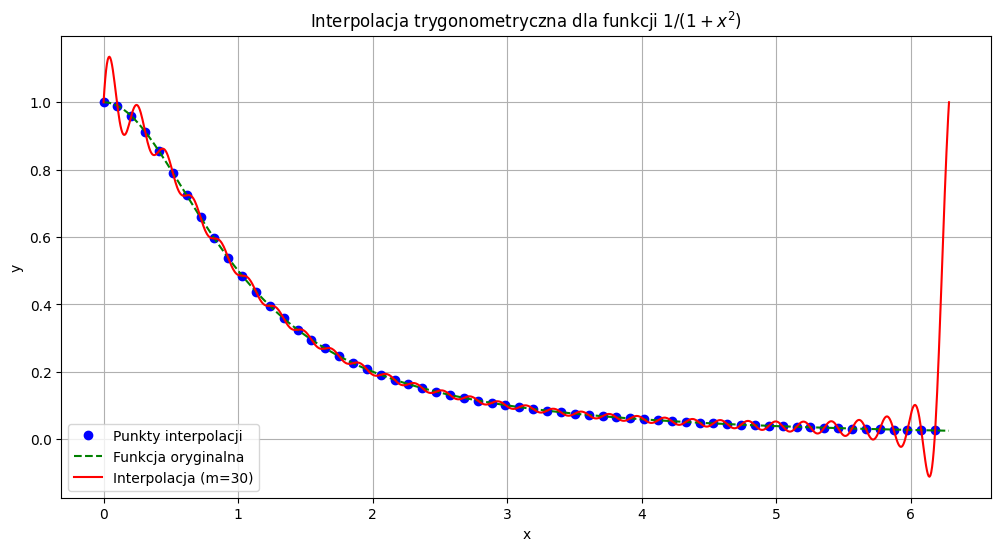

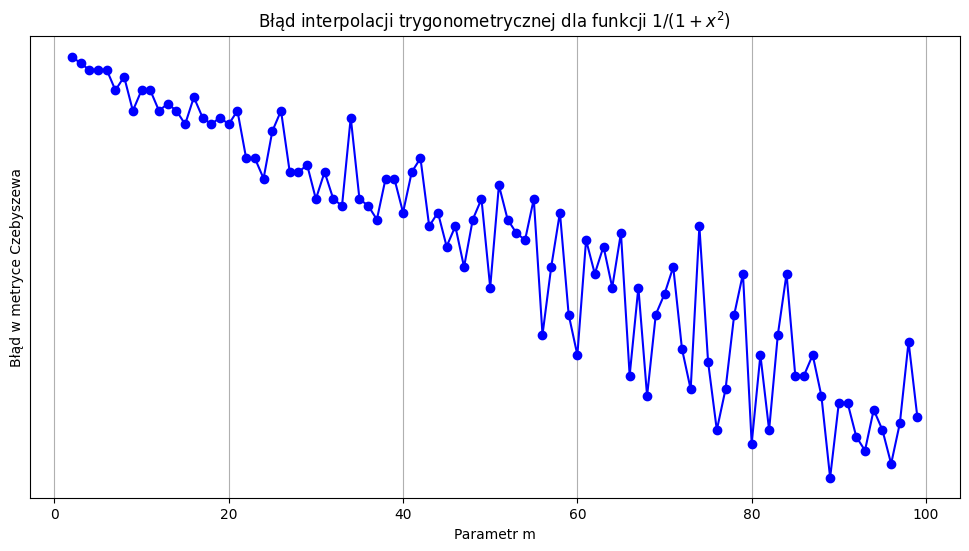


Wyniki dla funkcji $1/(1 + x^2)$:
Minimalny błąd: 9.75e-01
Osiągnięty dla m=89


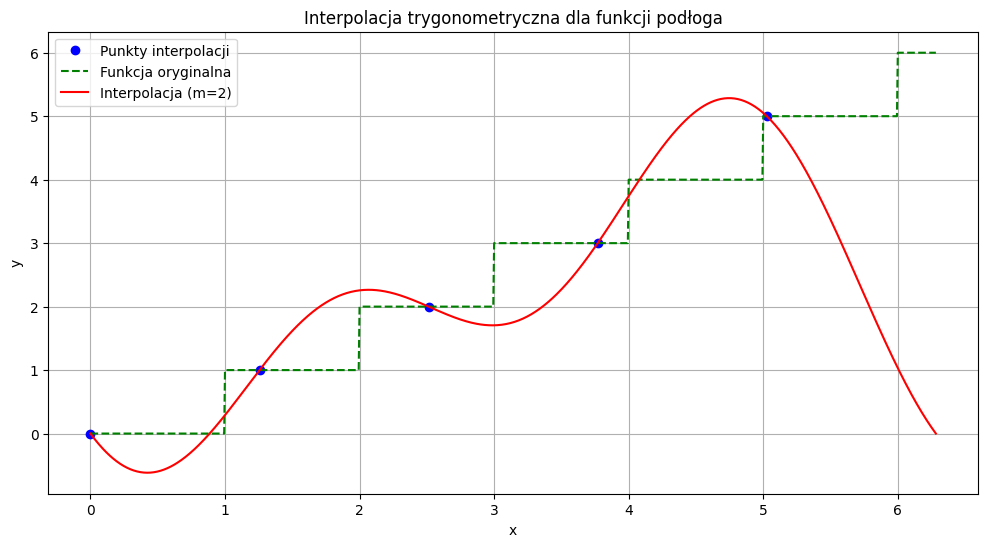

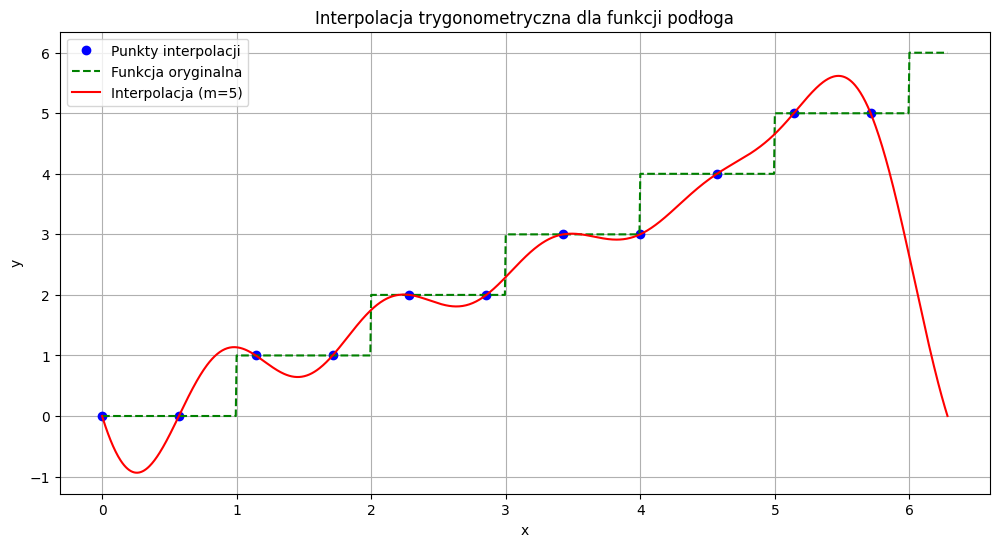

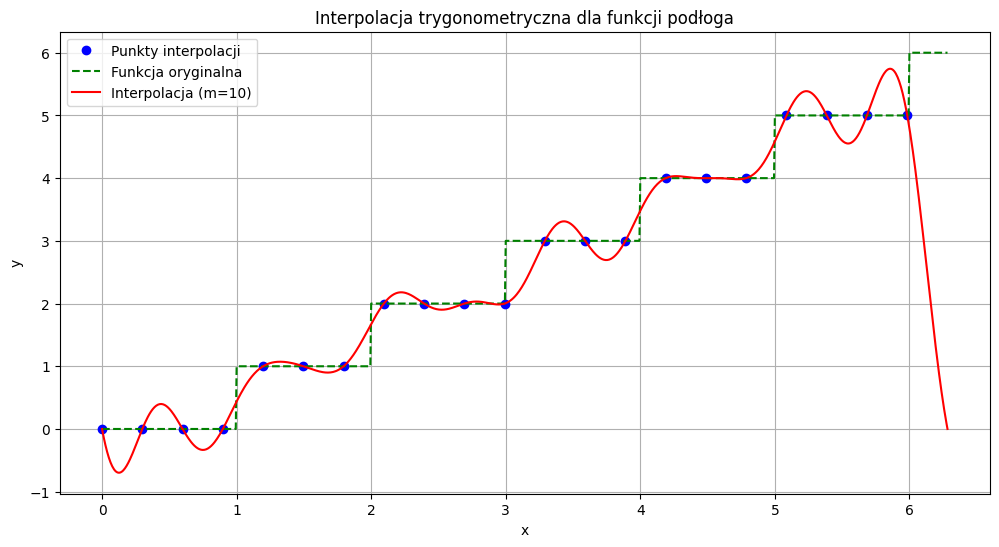

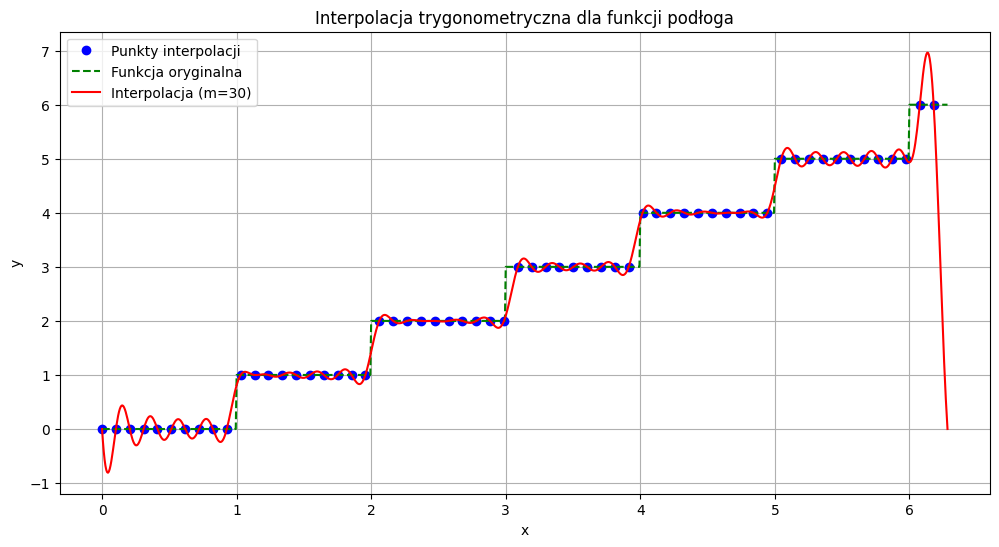

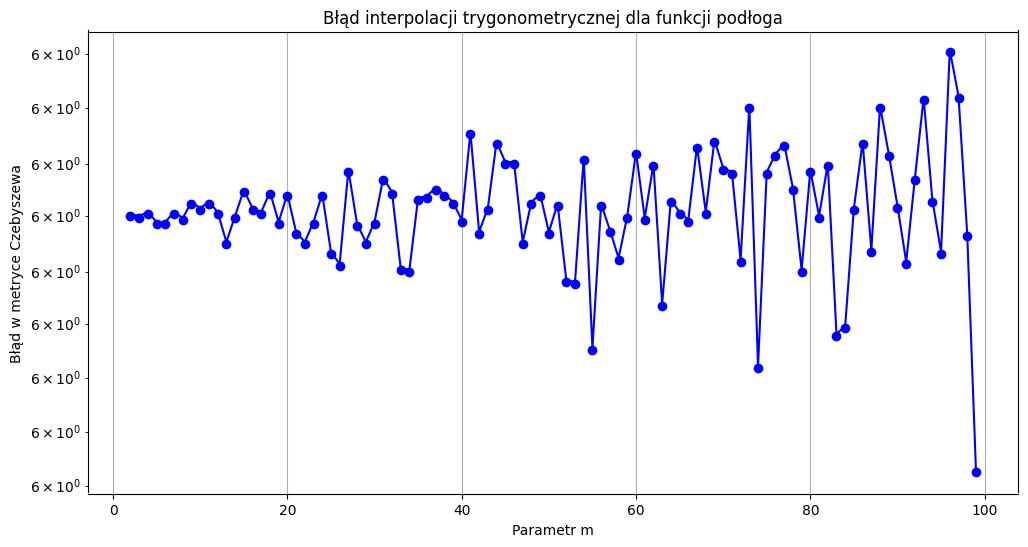


Wyniki dla funkcji podłoga:
Minimalny błąd: 6.00e+00
Osiągnięty dla m=99


In [60]:
def trigonometric_interpolation(f, m):
    """
    Compute trigonometric interpolation for function f with parameter m.
    
    Parameters:
    f: Function to interpolate
    m: Parameter determining number of coefficients
    
    Returns:
    callable: Interpolating function
    """
    n = 2 * m
    # Generate z points according to the formula
    z = np.array([(2 * np.pi * k) / (n + 1) for k in range(n + 1)])
    f_values = f(z)
    
    # Calculate c coefficient
    c = (1 / (n + 1)) * np.sum(f_values)
    
    # Calculate a and b coefficients
    a = np.zeros(m + 1)
    b = np.zeros(m + 1)
    
    for k in range(1, m + 1):
        a[k] = (2 / (n + 1)) * np.sum(f_values * np.cos(k * z))
        b[k] = (2 / (n + 1)) * np.sum(f_values * np.sin(k * z))
    
    def interpolant(x):
        """Evaluate the interpolating function at point x"""
        result = c
        for s in range(1, m + 1):
            result += a[s] * np.cos(s * x) + b[s] * np.sin(s * x)
        return result
    
    return interpolant

def test_trigonometric_interpolation():
    """
    Test the trigonometric interpolation with the same functions as before
    """
    test_funcs = {
        'trygonometryczna': (lambda x: np.sin(x) + np.cos(x), 'funkcji $sin(x) + cos(x)$'),
        'wymierna': (lambda x: 1/(1 + x**2), 'funkcji $1/(1 + x^2)$'),
        'podłoga': (lambda x: np.floor(x), 'funkcji podłoga')
    }
    
    m_values = range(2, 100)  # Test different m values
    
    for func_name, (func, label) in test_funcs.items():
        errors = []
        
        for m in m_values:
            # Get interpolating function
            interpolant = trigonometric_interpolation(func, m)
            
            # Compute error
            x_eval = np.linspace(0, 2*np.pi, 1000, endpoint=True)
            y_true = func(x_eval)
            y_approx = np.array([interpolant(x) for x in x_eval])
            error = np.max(np.abs(y_true - y_approx))
            errors.append(error)
            
            # Plot comparison for specific m values
            if m in [2, 5, 10, 30]:
                n = 2 * m
                z = np.array([(2 * np.pi * k) / (n + 1) for k in range(n + 1)])
                plt.figure(figsize=(12, 6))
                plt.plot(z, func(z), 'bo', label='Punkty interpolacji')
                plt.plot(x_eval, y_true, 'g--', label='Funkcja oryginalna')
                plt.plot(x_eval, y_approx, 'r-', label=f'Interpolacja (m={m})')
                plt.xlabel('x')
                plt.ylabel('y')
                plt.title(f'Interpolacja trygonometryczna dla {label}')
                plt.grid(True)
                plt.legend()
                plt.show()
        
        # Plot errors
        plt.figure(figsize=(12, 6))
        plt.plot(m_values, errors, 'bo-')
        plt.yscale('log')
        plt.xlabel('Parametr m')
        plt.ylabel('Błąd w metryce Czebyszewa')
        plt.title(f'Błąd interpolacji trygonometrycznej dla {label}')
        plt.grid(True)
        plt.show()
        
        # Print statistics
        min_error_idx = np.argmin(errors)
        print(f"\nWyniki dla {label}:")
        print(f"Minimalny błąd: {errors[min_error_idx]:.2e}")
        print(f"Osiągnięty dla m={m_values[min_error_idx]}")

# Run the tests
test_trigonometric_interpolation()